# Chemical Oscillations

Breif note of all resources used:
https://www.freecodecamp.org/news/eulers-method-explained-with-examples/
https://pubs-acs-org.ucd.idm.oclc.org/doi/10.1021/acs.jchemed.7b00703#
https://www.bibliotecapleyades.net/archivos_pdf/brusselator.pdf
https://personal.math.ubc.ca/~israel/m215/euler2/euler2.html

## Reaction
Note that this reaction is commonly known as the Brusselator

$$A \rightarrow X$$
$$B + X \rightarrow Y + D$$
$$2X + Y \rightarrow 3X$$
$$X \rightarrow C$$

## Rate Equations
$$\frac{dX}{dt} = A - (B + 1)X + X^2 Y$$
$$\frac{dY}{dt} = BX - X^2 Y$$

Equilibrium by solving with $(\dot{X}, \dot{Y}) = \vec{0}$ yields $(X, Y) = \left(A, \frac{B}{A}\right)$

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["indianred", "cornflowerblue", "mediumseagreen", "plum", "sandybrown"]) 

### Plotting the Stability Point

In [3]:
def StabilityPoint(A, B):
    return (A, B/A)

## Euler's Method
$$y_{i+1} = y_i + \Delta x(f_i)$$
where $f_i$ is the slope at $(x_i, y_i)$

### Application
$$X_{i+1} = X_i + \Delta t \frac{dX}{dt}$$
$$Y_{i+1} = Y_i + \Delta t \frac{dY}{dt}$$

# Code

In [4]:
# Representation of the ODEs as functions

def dXdt(X, Y, A, B):
    return A - (B + 1) * X + X**2 * Y

def dYdt(X, Y, A, B):
    return B * X - X**2 * Y

# Function must input initial values of X and Y along with constants A and B and output x against y over time
# Note global error on Euler method is of order O(stepSize)

def Brusselator(initialX=0, initialY=0, A=1, B=2, stepSize=1e-3, numberOfSteps=100000):

    currentX = initialX
    currentY = initialY

    currentTime = 0

    outputs = []

    for i in range(0, numberOfSteps+1): # plus one so it finalises the last step, note how they're added before the maths
        outputs.append([currentX, currentY])

        slopeX = dXdt(currentX, currentY, A, B)
        slopeY = dYdt(currentX, currentY, A, B)

        nextX = currentX + stepSize * slopeX
        nextY = currentY + stepSize * slopeY

        currentX = nextX
        currentY = nextY
        currentTime = currentTime + stepSize

    return outputs

In [5]:
def MakePhasePlot(dataset, A, B, labels=[], stationaryPoint=None):
    i=0
    for data in dataset:
        data = np.array(data)

        if labels != []: plt.plot(data[:,0], data[:,1], label=labels[i])
        else: plt.plot(data[:,0], data[:,1])

        i+=1

    if stationaryPoint != None: plt.scatter(stationaryPoint[0], stationaryPoint[1], label="Stable Point")

    plt.grid()
    plt.legend()

    plt.title(f"Phase-space Diagram for A = {A}, B = {B}")
    plt.xlabel("Concentration of X (arb. units)")
    plt.ylabel("Concentration of Y (arb. units)")

In [6]:
def MakeEvolutionPlot(data, A, B, stepSize, initalCoords=[]):
    
    times = np.arange(0, len(data))
    times = [el*stepSize for el in times]

    xValues = []
    yValues = []

    for el in data:
        xValues.append(el[0])
        yValues.append(el[1])

    if initalCoords != []:
        plt.plot(times, xValues, label=f"Initial X={initalCoords[0]}")
        plt.plot(times, yValues, label=f"Initial Y={initalCoords[1]}")

    else:
        plt.plot(times, xValues, label="Substance X")
        plt.plot(times, yValues, label="Substance Y")

    plt.title(f"Time Evolution of Concentrations for A = {A}, B = {B}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Concentration (arb. units)")
    plt.legend()
    plt.grid()

In [7]:
def MakePlots(initialX, initialY, A, B, stepSize, numberOfSteps, initialConditionsLabel):
    
    data = Brusselator(initialX, initialY, A, B, stepSize, numberOfSteps)
    data = np.array(data)

    times = np.arange(0, len(data))
    times = [el*stepSize for el in times]

    xValues = []
    yValues = []

    for el in data:
        xValues.append(el[0])
        yValues.append(el[1])
    
    figure, (concentrationAxis, phasespaceAxis) = plt.subplots(1, 2)

    figure.set_size_inches(15, 5)

    concentrationAxis.plot(times, xValues, label="Substance X")
    concentrationAxis.plot(times, yValues, label="Substance Y")

    concentrationAxis.set_title(f"Concentrations of X and Y with A={A}, B={B}")
    concentrationAxis.set_xlabel("Time (seconds)")
    concentrationAxis.set_ylabel("Concentration (arb. units)")
    concentrationAxis.legend()
    concentrationAxis.grid()

    phasespaceAxis.plot(data[:,0], data[:,1], label=f"Initial Conditions: X={initialX}, Y={initialY}")
    phasespaceAxis.set_title(f"Phase-space Diagram with A={A}, B={B}")
    phasespaceAxis.set_xlabel("Concentration of X (arb. units)")
    phasespaceAxis.set_ylabel("Concentration of Y (arb. units)")
    phasespaceAxis.legend()
    phasespaceAxis.grid()

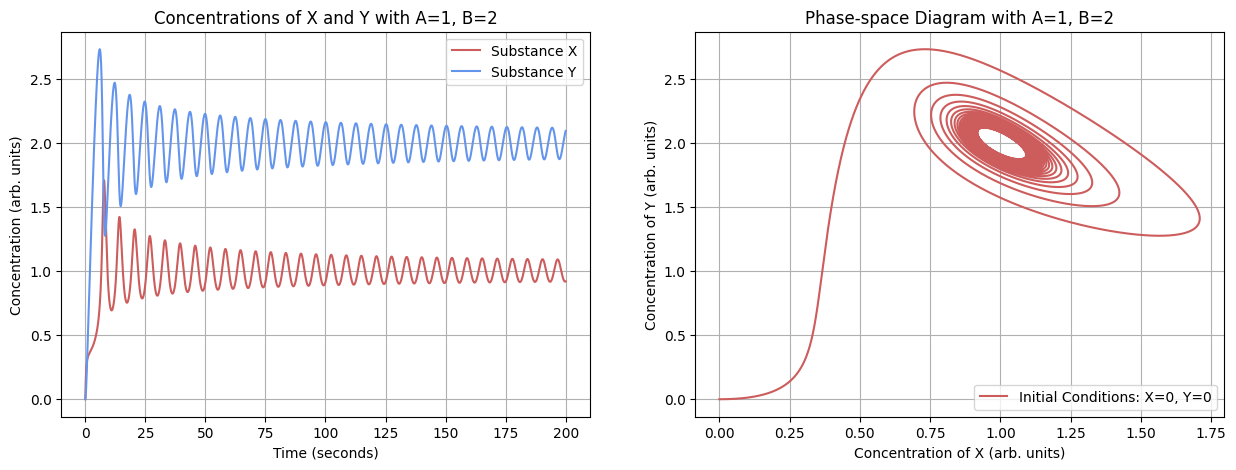

In [8]:
MakePlots(initialX=0, initialY=0, A=1, B=2, stepSize=1e-3, numberOfSteps=200000, initialConditionsLabel="X=0, Y=0")

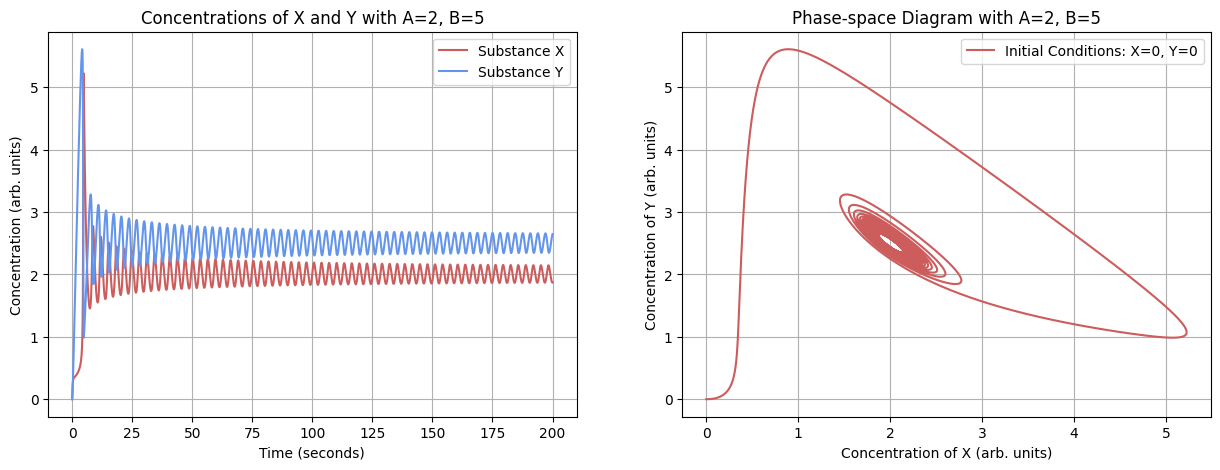

In [9]:
MakePlots(initialX=0, initialY=0, A=2, B=5, stepSize=1e-3, numberOfSteps=200000, initialConditionsLabel="X=0, Y=0")

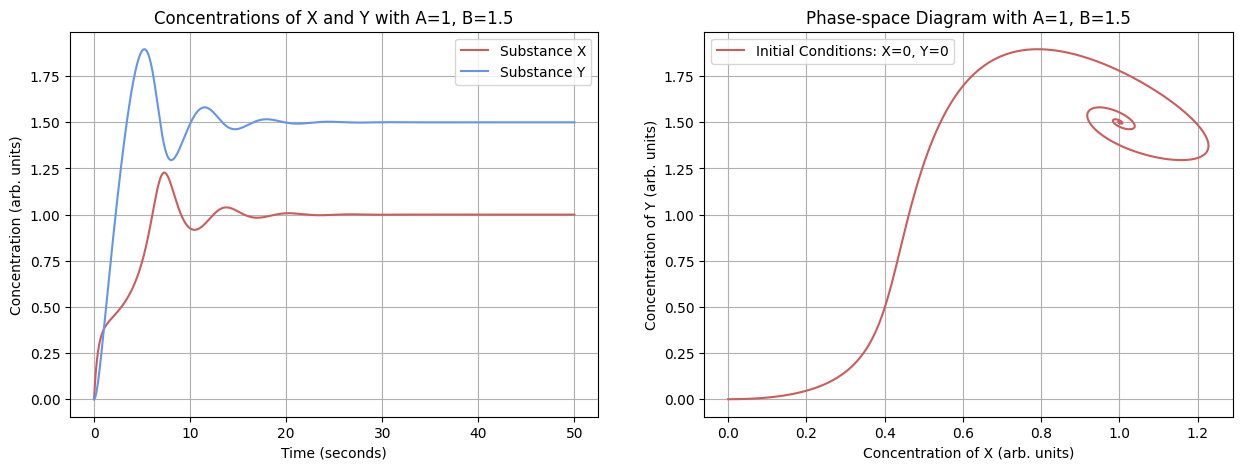

In [10]:
MakePlots(initialX=0, initialY=0, A=1, B=1.5, stepSize=1e-3, numberOfSteps=50000, initialConditionsLabel="X=0, Y=0")

#### Varying Initial Conditions: A=1, B=2

In [32]:
datasetVaryingInitialConditions01 = [Brusselator(0, 0), Brusselator(2, 0),\
                                    Brusselator(0, 2), Brusselator(2, 2),\
                                    Brusselator(0, 3), Brusselator(2, 3)]

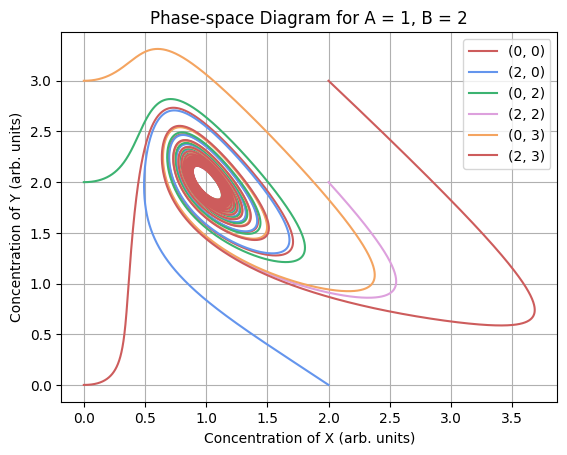

In [33]:
MakePhasePlot(datasetVaryingInitialConditions01, 1, 2, labels=["(0, 0)", "(2, 0)", "(0, 2)", "(2, 2)", "(0, 3)", "(2, 3)"])

In [129]:
# Note the behaviour of the steady state is independent of the inital conditions however features such as the phase aren't

### Varying initial conditions for A=1, B=3

In [14]:
datasetVaryingInitialConditions02 = [Brusselator(0, 0, A=1, B=3), Brusselator(2, 0, A=1, B=3),\
                                    Brusselator(0, 2, A=1, B=3), Brusselator(2, 2, A=1, B=3),\
                                    Brusselator(0, 3, A=1, B=3), Brusselator(2, 3, A=1, B=3)]

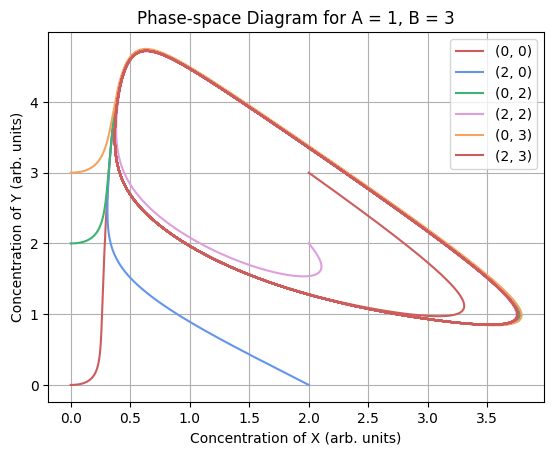

In [16]:
MakePhasePlot(datasetVaryingInitialConditions02, 1, 3, labels=["(0, 0)", "(2, 0)", "(0, 2)", "(2, 2)", "(0, 3)", "(2, 3)"])

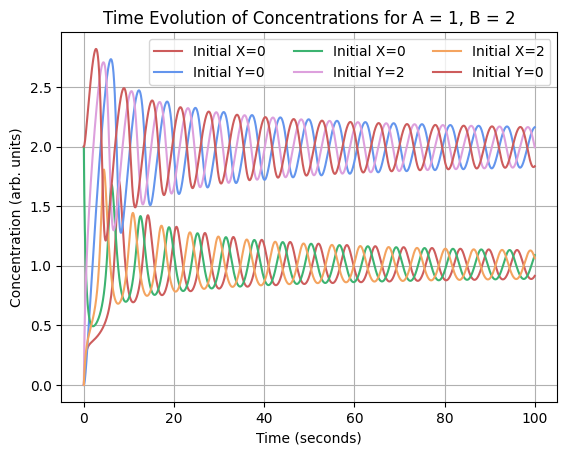

In [22]:
MakeEvolutionPlot(datasetVaryingInitialConditions01[0], 1, 2, 1e-3, initalCoords=[0, 0])
MakeEvolutionPlot(datasetVaryingInitialConditions01[1], 1, 2, 1e-3, initalCoords=[0, 2])
MakeEvolutionPlot(datasetVaryingInitialConditions01[2], 1, 2, 1e-3, initalCoords=[2, 0])
plt.legend(ncol=3)

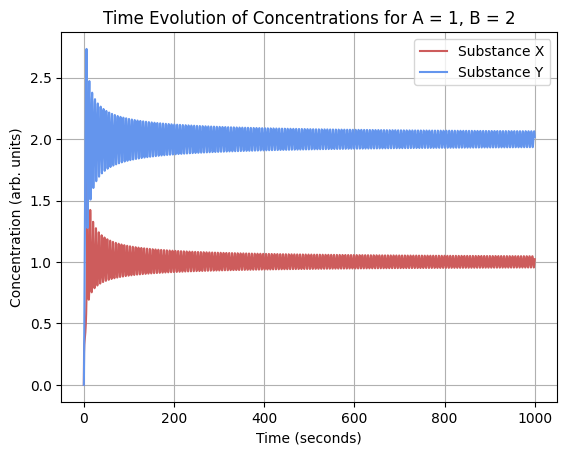

In [23]:
MakeEvolutionPlot(Brusselator(0, 0, numberOfSteps=10**6), 1, 2, 1e-3)
# Note with very long simulation lengths we can see the simulation approaches a constant amplitude of oscillations. LIMiT